All: [ 52.94117647  47.05882353]
Training: [ 57.14285714  42.85714286]
Test: [ 50.  50.]
Fraction Correct [Accuracy]:
0.8
Samples correctly classified:
[1 2 3 4 5 6 7 8]
Samples incorrectly classified:
[0 9]


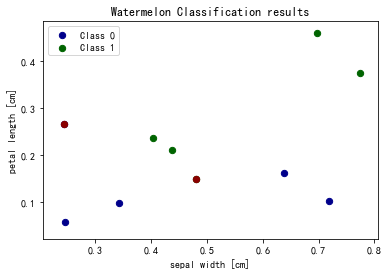

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

dataLoad = pd.read_csv('data/watermelon30a.txt', header=None)
x,y = dataLoad.values[:, :-1], dataLoad[2].tolist()
y = pd.Categorical(y).codes
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.45, random_state=123,
                                                    stratify=y)
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

classifier = KNeighborsClassifier()
classifier.fit(train_x, train_y)
pred_y = classifier.predict(test_x)

print("Fraction Correct [Accuracy]:")
accuracy = np.sum(pred_y == test_y) / float(len(test_y))
print(accuracy)

print("Samples correctly classified:")
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print("Samples incorrectly classified:")
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)
colors = ["darkblue","darkgreen"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_x[idx, 0],test_x[idx, 1],c=color, s =40, label="Class %s" % n)

plt.scatter(test_x[incorrect_idx, 0],test_x[incorrect_idx,1],c='darkred', s =40)
plt.xlabel("sepal width [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.title("Watermelon Classification results")
plt.show()